In [1]:
from automation import automation,battle,random_battle,random_battle_env,general_battle_env
from nfsp import train
from matplotlib import pyplot as plt
import torch
import numpy as np
import time
import random
from tqdm.notebook import tqdm

In [49]:
env = general_battle_env()

In [50]:
result = train(env)

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [ ]:
plt.subplot(2,2,1)

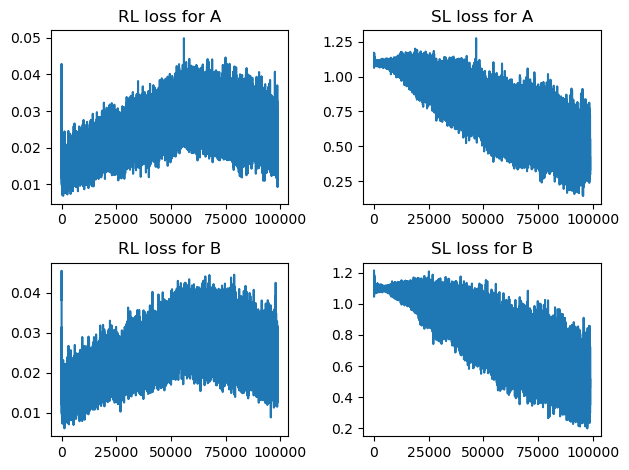

In [97]:
plt.subplot(2,2,1)
plt.plot(result['p1_loss'][0])
plt.title('RL loss for A')
plt.subplot(2,2,2)
plt.plot(result['p1_loss'][1])
plt.title('SL loss for A')
plt.subplot(2,2,3)
plt.plot(result['p2_loss'][0])
plt.title('RL loss for B')
plt.subplot(2,2,4)
plt.plot(result['p2_loss'][1])
plt.title('SL loss for B')
plt.tight_layout()
plt.savefig('fig/loss.png')

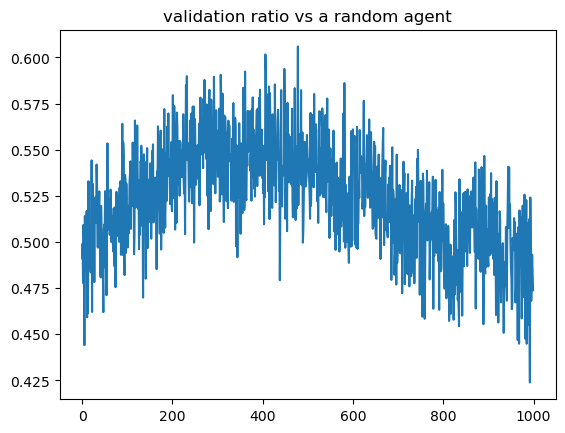

In [98]:
plt.plot(np.array(result['ratio'][0]))
plt.title('validation ratio vs a random agent')
plt.savefig('fig/val_ratio.png')

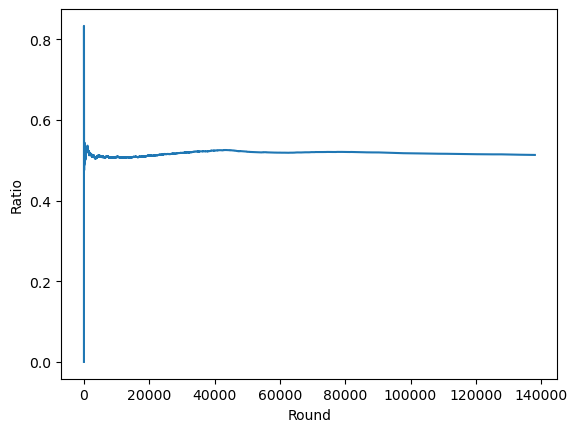

In [92]:
ratio = np.cumsum((np.array(result['p1_reward'])+1)/2)/np.arange(1,len(result['p1_reward'])+1)
plt.plot(ratio)
plt.xlabel('Round')
plt.ylabel('Ratio')
plt.savefig('fig/ratio.png')

In [39]:
p1_policy_model = result['p1_model'][1]
p1_policy_model.act(torch.FloatTensor(np.array([5.,4.,1.,5.,1.,1.])))

2

In [10]:
def pk_ai(model,n_round = 100):
    move = ['攻击','护盾','充能']
    env = general_battle_env(print_info=True)
    A = env.player
    B = env.enemy
    for i in range(n_round):
        time.sleep(0)
        if A.hp==0 and B.hp==0:
            print('TIE')
            break
        elif A.hp ==0:
            print('Win: B')
            break
        elif B.hp ==0:
            print('Win: A')
            break
        time.sleep(0.3)
        a_t = model.act(torch.FloatTensor(env.get_status()[1]))
        action = input()#random.choice([0,1,2])
        print('palyer:',move[int(action)],'enemy:',move[int(a_t)])
        env.step(action_a=int(action),action_b=int(a_t))

In [18]:
pk_ai(result['p2_model'][1])

palyer: 攻击 enemy: 充能
charge: 2.0
HP of A:5, HP of B:4.0
palyer: 护盾 enemy: 充能
charge: 3.0
HP of A:5, HP of B:4.0
palyer: 攻击 enemy: 充能
charge: 4.0
HP of A:5, HP of B:3.0
palyer: 攻击 enemy: 充能
charge: 5.0
HP of A:5, HP of B:2.0
palyer: 攻击 enemy: 攻击
HP of A:0.0, HP of B:1.0
Win: B


In [42]:
def pk_ai_sim(model,n_round = 1000):
    win = 0
    n = 0
    ratio = []
    for i in tqdm(range(n_round)):
        env = general_battle_env(print_info=False)
        while not env.end:
            a_t = model.act(torch.FloatTensor(env.get_status()[1]))
            action = random.choice([0,1,2])
            env.step(action_a=int(action),action_b=int(a_t))
        n+=1
        win+=(1-env.result)
        ratio.append(win/n)
    return ratio

        

In [43]:
ratio = pk_ai_sim(result['p1_model'][1])

  0%|          | 0/1000 [00:00<?, ?it/s]

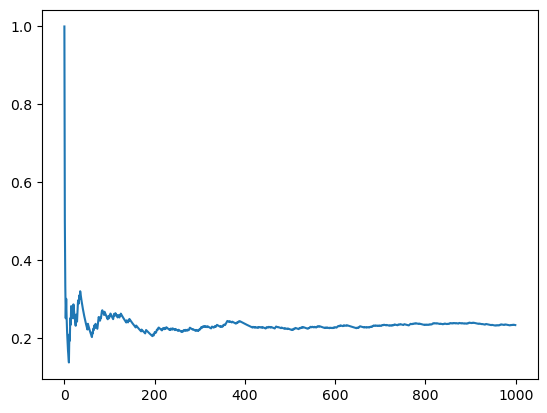

In [44]:
plt.plot(ratio)
plt.show()

In [108]:
ratio[-10]

0.5688619757782004

In [112]:
p1_policy_model.act(torch.FloatTensor(np.array([5.,1.,1.,5.,1.,1.])))

0

In [21]:
from common.utils import epsilon_scheduler

In [27]:
epsilon = []
max_frames = 1000000
eps_start = 1
eps_final = 0.02
eps_decay = 420000
eps = epsilon_scheduler(eps_start, eps_final, eps_decay)
for i in range(max_frames):
    epsilon.append(eps(i))


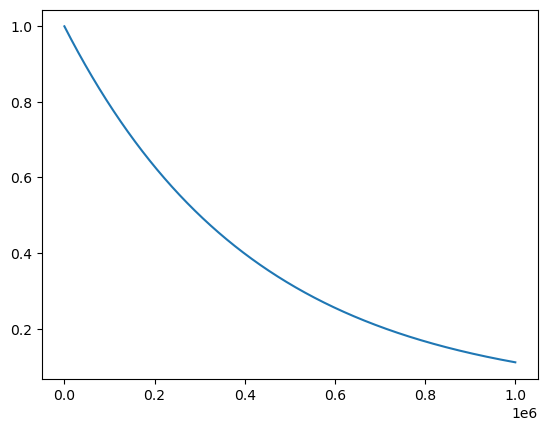

In [28]:
plt.plot(epsilon)

In [58]:
result['p1_model'][0].forward(torch.FloatTensor(np.array([5.,1.,1.,1.,5.,1.])).unsqueeze(0))

tensor([[ 0.3143, -0.0297,  0.1996]], grad_fn=<SubBackward0>)

In [62]:
result['p1_model'][1].forward(torch.FloatTensor(np.array([1.,1.,1.,5.,1.,1])).unsqueeze(0))

tensor([[0.9351, 0.0349, 0.0299]], grad_fn=<SoftmaxBackward0>)

In [139]:
np.exp([-0.0147, -0.0519, -0.0081])

array([0.98540752, 0.9494238 , 0.99193272])

In [47]:
torch.save(result['p2_model'][1].state_dict(),'valuable_model/p2_policy_10w.pth')
torch.save(result['p2_model'][0].state_dict(),'valuable_model/p2_opt_10w.pth')
torch.save(result['p1_model'][1].state_dict(),'valuable_model/p1_policy_10w.pth')
torch.save(result['p1_model'][0].state_dict(),'valuable_model/p1_opt_10w.pth')

In [57]:
env.history

[[array([5., 1., 1., 5., 1., 1.]), 0, 2],
 [array([4., 2., 1., 5., 1., 1.]), 0, 2],
 [array([3., 3., 1., 5., 1., 1.]), 0, 0],
 [array([2., 1., 1., 2., 1., 1.]), 0, 0]]

In [64]:
env.history

[[array([5., 1., 1., 5., 1., 1.]), 0, 2],
 [array([4., 2., 1., 5., 1., 1.]), 0, 2],
 [array([3., 3., 1., 5., 1., 1.]), 0, 0],
 [array([2., 1., 1., 2., 1., 1.]), 0, 0]]

In [128]:
result['p1_model'][1].forward(torch.FloatTensor(np.array([5.,1.,0.5,3.,1.,1.])).unsqueeze(0))

tensor([[0.9217, 0.0351, 0.0433]], grad_fn=<SoftmaxBackward0>)

In [133]:
result['p2_model'][1].forward(torch.FloatTensor(np.array([5.,1.,0.5,4.,1.,1.])).unsqueeze(0))

tensor([[0.1835, 0.0405, 0.7760]], grad_fn=<SoftmaxBackward0>)

In [142]:
def pk_ai_sim_weisuo(model,n_round = 1000):
    win = 0
    n = 0
    ratio = []
    for i in tqdm(range(n_round)):
        env = general_battle_env(print_info=False)
        j = 0
        while not env.end:

            a_t = model.act(torch.FloatTensor(env.get_status()[1]))
            action = 1 if j&1 else 0
            j+=1
            env.step(action_a=int(action),action_b=int(a_t))
        n+=1
        win+=(1-env.result)
        ratio.append(win/n)
    return ratio

In [147]:
weisuo_ratio = pk_ai_sim_weisuo(result['p2_model'][1])

  0%|          | 0/1000 [00:00<?, ?it/s]

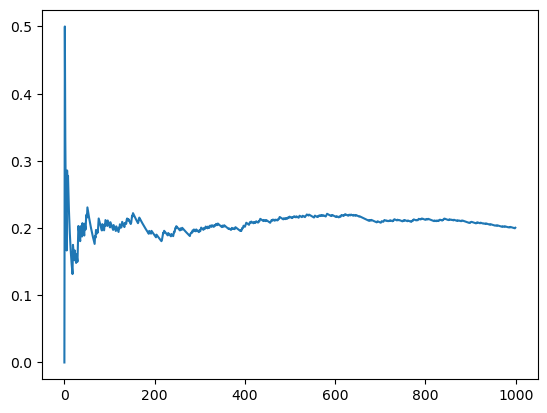

In [148]:
plt.plot(weisuo_ratio)